# DS 220 – Project 2: Data Analysis with Python 
## Exploring Survival on the Titanic with Pandas
- In this project I use the classic Titanic passenger dataset to practice data analysis with Python and the pandas library. The problem space is understanding which kinds of passengers were more likely to survive the sinking of the Titanic in 1912. 
- This topic matters for data analysis because it has clear variables (age, ticket class, fare, sex, family relationships, etc.) and a concrete outcome (survived or not). 
- Stakeholders who could benefit from this type of analysis include historians, safety researchers, and anyone interested in how social and economic factors can affect survival in disasters. 



## Dataset Description

I use the `titanic.csv` dataset from the official pandas documentation. Each row represents one passenger on the Titanic. Some of the key columns I use are:

- `Survived`: 1 = survived, 0 = did not survive  
- `Pclass`: passenger class (1 = 1st, 2 = 2nd, 3 = 3rd)  
- `Sex`: male or female  
- `Age`: age in years  
- `SibSp`: number of siblings or spouses aboard  
- `Parch`: number of parents or children aboard  
- `Fare`: ticket fare  
- `Embarked`: port of embarkation (C = Cherbourg, Q = Queenstown, S = Southampton)

This dataset is directly connected to my problem: I can use these variables to ask who survived, how survival differs across groups, and what patterns show up in age, class, and family structure.


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Make plots show inside the notebook
%matplotlib inline

# Load the Titanic dataset from the local CSV file in the repo
df = pd.read_csv("titanic.csv")

# Show the first few rows to confirm it loaded correctly
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [2]:
print("Shape (rows, columns):", df.shape)
print("\nColumn types and non-null counts:")
df.info()

Shape (rows, columns): (891, 12)

Column types and non-null counts:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [3]:
df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [4]:
# Make a safe copy
df = df.copy()

# Fill missing ages with the median age
median_age = df["Age"].median()
df["Age"] = df["Age"].fillna(median_age)

# Add a readable survival label
df["SurvivedLabel"] = df["Survived"].map({0: "Died", 1: "Survived"})

# Check remaining missing values
df.isna().sum()

PassengerId        0
Survived           0
Pclass             0
Name               0
Sex                0
Age                0
SibSp              0
Parch              0
Ticket             0
Fare               0
Cabin            687
Embarked           2
SurvivedLabel      0
dtype: int64

## Exploratory Data Analysis (EDA)

Before answering questions, I explore the structure of the dataset: number of rows and columns, data types, summary statistics, and missing values. I also create a few helper variables, such as a readable survival label, to make later analysis easier.


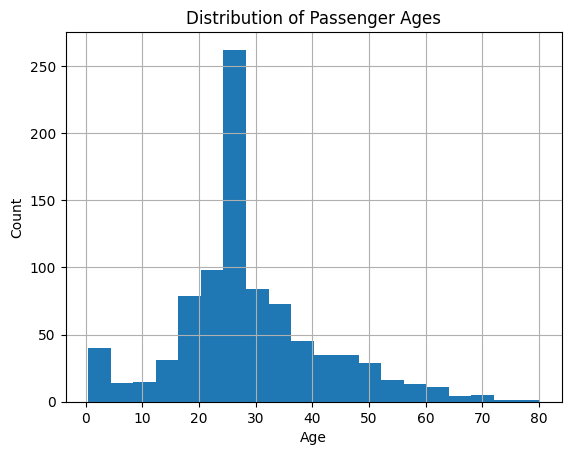

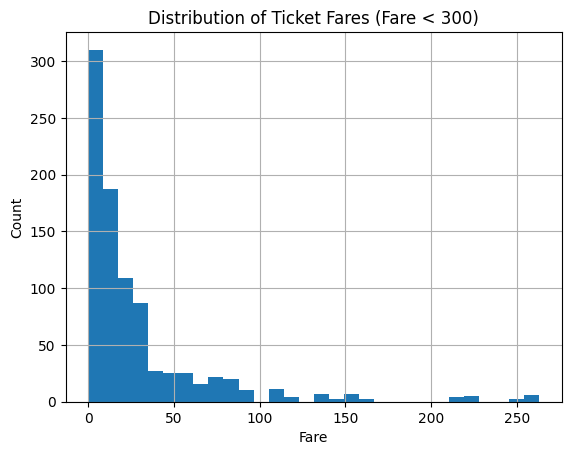

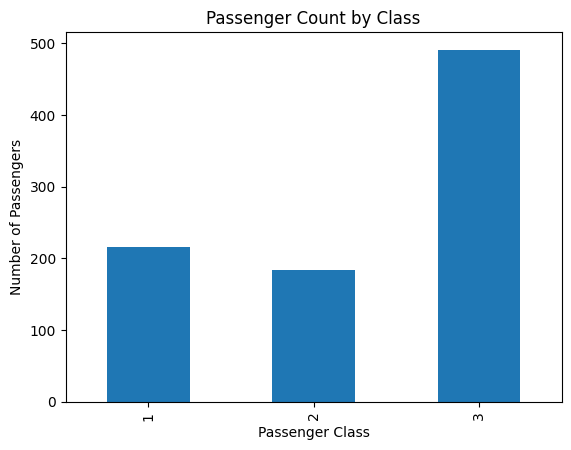

In [5]:
# Histogram of Age
plt.figure()
df["Age"].hist(bins=20)
plt.xlabel("Age")
plt.ylabel("Count")
plt.title("Distribution of Passenger Ages")
plt.show()

# Histogram of Fare for fares < 300 to avoid long tail
plt.figure()
df[df["Fare"] < 300]["Fare"].hist(bins=30)
plt.xlabel("Fare")
plt.ylabel("Count")
plt.title("Distribution of Ticket Fares (Fare < 300)")
plt.show()

# Bar chart of passenger class counts
plt.figure()
df["Pclass"].value_counts().sort_index().plot(kind="bar")
plt.xlabel("Passenger Class")
plt.ylabel("Number of Passengers")
plt.title("Passenger Count by Class")
plt.show()


## Questions to Address

Here are my questions I am using for this project:

1. What is the overall survival rate of passengers on the Titanic?
2. How does survival rate differ between male and female passengers?
3. How does survival rate differ by passenger class (1st, 2nd, 3rd)?
4. How are passenger ages distributed, and does age look different for survivors vs. non-survivors?
5. What is the relationship between ticket fare and class, and do higher fares seem linked to survival?
6. Does traveling with more family (using `SibSp` + `Parch`) change the chance of survival?
7. Do survival rates differ by port of embarkation (`Embarked`)?


### Question 1: What is the overall survival rate?

I first calculate the percentage of passengers who survived out of the full dataset.



In [6]:
survival_counts = df["Survived"].value_counts()
survival_rate = df["Survived"].mean() * 100

print("Counts of passengers by survival (0 = died, 1 = survived):")
print(survival_counts)
print(f"\nOverall survival rate: {survival_rate:.2f}%")

Counts of passengers by survival (0 = died, 1 = survived):
Survived
0    549
1    342
Name: count, dtype: int64

Overall survival rate: 38.38%


**Answer:** The overall survival rate is about 38% (rounded from the printed value). Most passengers did not survive, so the data is heavily imbalanced toward non-survivors.



### Question 2: How does survival rate differ between male and female passengers?

I compare survival rates for male and female passengers using groupby.

Survival rate by sex (%):
Sex
female    74.203822
male      18.890815
Name: Survived, dtype: float64


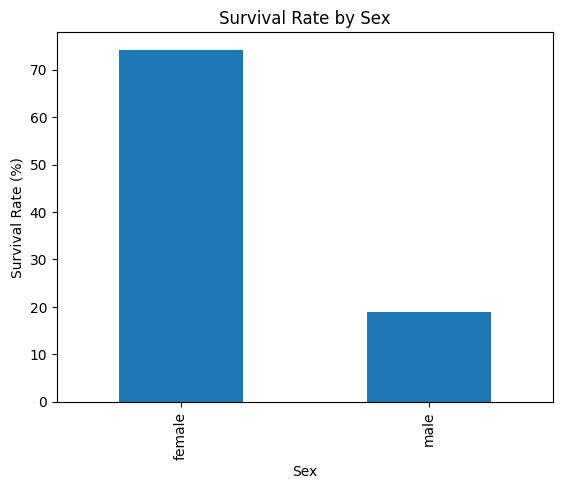

In [7]:
survival_by_sex = df.groupby("Sex")["Survived"].mean() * 100
print("Survival rate by sex (%):")
print(survival_by_sex)

plt.figure()
survival_by_sex.plot(kind="bar")
plt.ylabel("Survival Rate (%)")
plt.title("Survival Rate by Sex")
plt.show()


**Answer:** Female passengers have a much higher survival rate than male passengers. This matches the historical idea that women were prioritized for lifeboats.


### Question 3: How does survival rate differ by passenger class?

I compare survival rates across 1st, 2nd, and 3rd class passengers.


Survival rate by class (%):
Pclass
1    62.962963
2    47.282609
3    24.236253
Name: Survived, dtype: float64


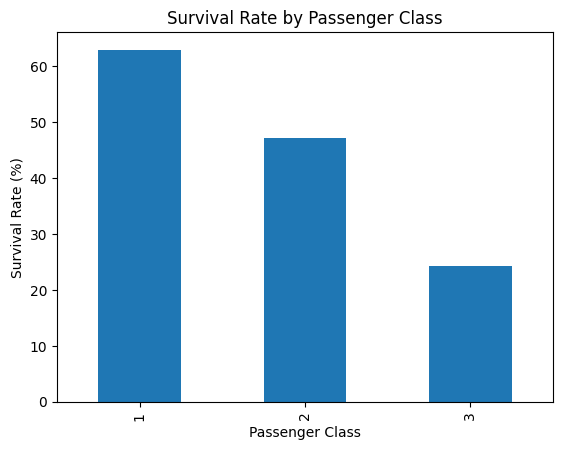

In [8]:
survival_by_class = df.groupby("Pclass")["Survived"].mean() * 100
print("Survival rate by class (%):")
print(survival_by_class)

plt.figure()
survival_by_class.plot(kind="bar")
plt.ylabel("Survival Rate (%)")
plt.xlabel("Passenger Class")
plt.title("Survival Rate by Passenger Class")
plt.show()


**Answer:** First-class passengers have the highest survival rate, second class is in the middle, and third class has the lowest survival rate. Social and economic status clearly affected access to safety.


### Question 4: How are ages distributed, and does age differ for survivors vs. non-survivors?

I compare age statistics and visualize age distributions for survivors and non-survivors.


Age statistics by survival status:
               count       mean        std   min   25%   50%   75%   max
SurvivedLabel                                                           
Died           549.0  30.028233  12.499986  1.00  23.0  28.0  35.0  74.0
Survived       342.0  28.291433  13.764425  0.42  21.0  28.0  35.0  80.0


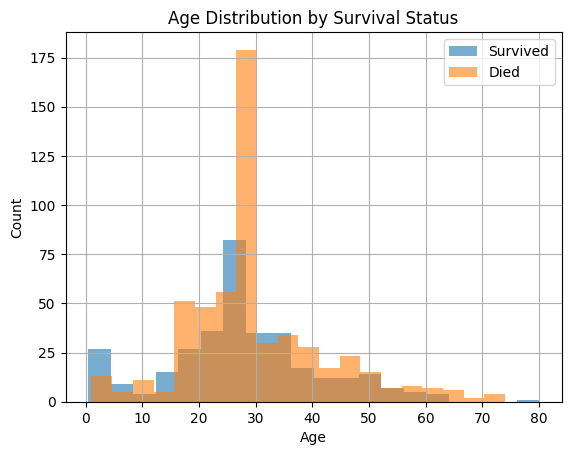

In [9]:
print("Age statistics by survival status:")
print(df.groupby("SurvivedLabel")["Age"].describe())

plt.figure()
df[df["Survived"] == 1]["Age"].hist(bins=20, alpha=0.6, label="Survived")
df[df["Survived"] == 0]["Age"].hist(bins=20, alpha=0.6, label="Died")
plt.xlabel("Age")
plt.ylabel("Count")
plt.title("Age Distribution by Survival Status")
plt.legend()
plt.show()


**Answer:** Both groups span a wide age range, but survivors are slightly younger on average. The histograms show a visible cluster of children among survivors, which fits the idea that children were also prioritized.

### Question 5: What is the relationship between ticket fare and class, and do higher fares link to survival?

I look at average fares by class and compare fares for survivors vs. non-survivors.

Average fare by class:
Pclass
1    84.154687
2    20.662183
3    13.675550
Name: Fare, dtype: float64


<Figure size 640x480 with 0 Axes>

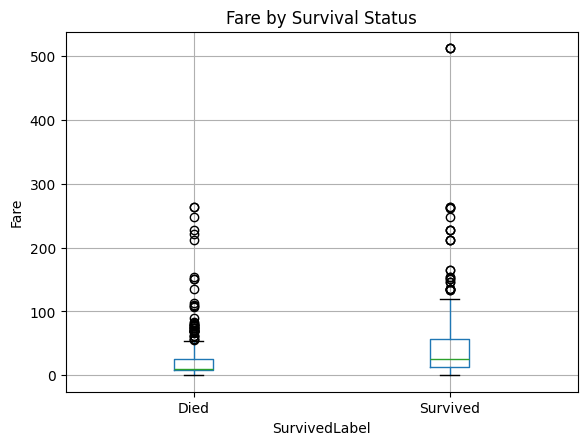

In [10]:
avg_fare_by_class = df.groupby("Pclass")["Fare"].mean()
print("Average fare by class:")
print(avg_fare_by_class)

plt.figure()
df.boxplot(column="Fare", by="SurvivedLabel")
plt.title("Fare by Survival Status")
plt.suptitle("")
plt.ylabel("Fare")
plt.show()


**Answer:** Average fares are highest in first class and lowest in third class. The boxplot shows that survivors generally paid higher fares. This suggests that paying more for a ticket (and being in a higher class) was associated with better chances of survival.


### Question 6: Does traveling with more family change the chance of survival?

I create a `FamilySize` variable from `SibSp` and `Parch` and compare survival rates by family size.


Survival rate by family size (%):
FamilySize
1     30.353818
2     55.279503
3     57.843137
4     72.413793
5     20.000000
6     13.636364
7     33.333333
8      0.000000
11     0.000000
Name: Survived, dtype: float64


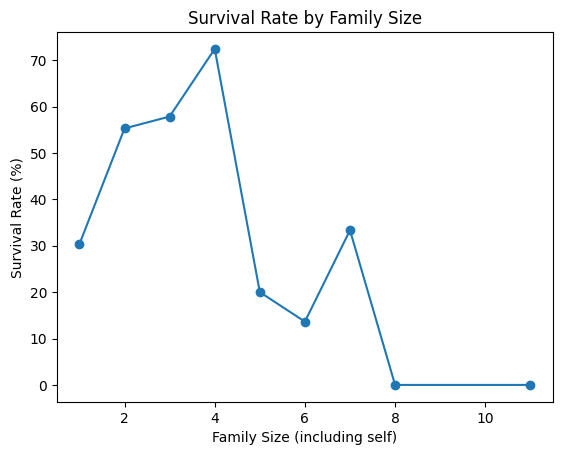

In [11]:
df["FamilySize"] = df["SibSp"] + df["Parch"] + 1

survival_by_family = df.groupby("FamilySize")["Survived"].mean() * 100
print("Survival rate by family size (%):")
print(survival_by_family)

plt.figure()
survival_by_family.plot(kind="line", marker="o")
plt.xlabel("Family Size (including self)")
plt.ylabel("Survival Rate (%)")
plt.title("Survival Rate by Family Size")
plt.show()


**Answer:** Small family sizes (around 1–3) often show higher survival rates, while very large families tend to have lower rates. It may have been harder for big family groups to keep everyone together and get seats in lifeboats.


### Question 7: Do survival rates differ by port of embarkation?

I compare survival rates across the ports where passengers boarded the ship.

Survival rate by port of embarkation (%):
Embarked
C    55.357143
Q    38.961039
S    33.695652
Name: Survived, dtype: float64


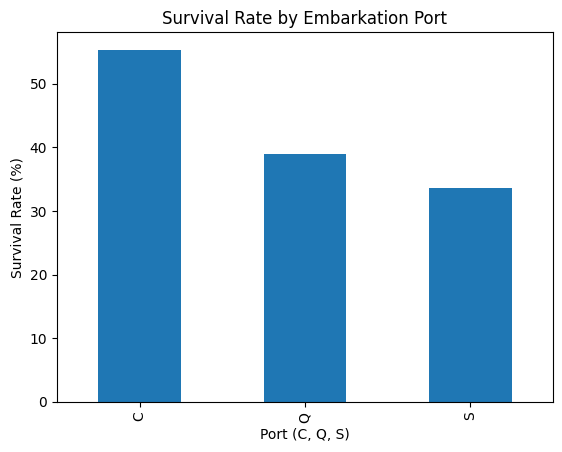

In [12]:
survival_by_port = df.groupby("Embarked")["Survived"].mean() * 100
print("Survival rate by port of embarkation (%):")
print(survival_by_port)

plt.figure()
survival_by_port.plot(kind="bar")
plt.xlabel("Port (C, Q, S)")
plt.ylabel("Survival Rate (%)")
plt.title("Survival Rate by Embarkation Port")
plt.show()


**Answer:** Survival rates are different across ports. For example, passengers from Cherbourg (C) tend to have higher survival than those from Southampton (S), which is related to differences in ticket class and passenger mix from each port.


## Overall Insights

Taken together, the analyses show that survival on the Titanic was not random. Female passengers and passengers in first class had much higher survival rates, while male passengers and those in third class had much lower rates. Age also matters: children and younger passengers survived at higher rates than older adults.

Ticket fares and passenger class are tightly linked, and higher fares are associated with better chances of survival. Family size also plays a role, with very large families facing more difficulty surviving. Differences between embarkation ports reflect how passenger class and ticket types were distributed.

This project shows how pandas and basic visualizations can turn a historical event into a data-driven story. By asking clear questions, cleaning the data, summarizing patterns, and visualizing key relationships, it becomes easier to explain what happened and why.


## References

- pandas documentation: Titanic dataset example.  
- Matplotlib documentation for histograms and bar charts.  
- DS 220 course notes on NumPy, pandas, and visualization.
